In [92]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [93]:
import numpy as np
import pandas as pd

In [94]:
url = 'https://raw.githubusercontent.com/tusharvaishya222/NLP_Sentiment_Analysis/master/train.csv'
train_ds = pd.read_csv(url,encoding='latin1');

validation_ds = pd.read_csv('https://raw.githubusercontent.com/tusharvaishya222/NLP_Sentiment_Analysis/master/test.csv',encoding='latin1');

In [95]:
train_ds = train_ds[['text','sentiment']]
validation_ds = validation_ds[['text','sentiment']]

In [96]:
train_ds['text'].fillna('',inplace=True)
validation_ds['text'].fillna('',inplace=True)

In [97]:
def func(sentiment):
    if sentiment =='positive':
        return 0;
    elif sentiment =='negative':
        return 1;
    else:
        return 2;
train_ds['sentiment'] = train_ds['sentiment'].apply(func)
validation_ds['sentiment'] = validation_ds['sentiment'].apply(func)

In [98]:
x_train = np.array(train_ds['text'].tolist())
y_train = np.array(train_ds['sentiment'].tolist())
x_test = np.array(validation_ds['text'].tolist())
y_test = np.array(validation_ds['sentiment'].tolist())

In [99]:
x_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [100]:
y_train

array([2, 1, 1, ..., 0, 0, 2])

In [101]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [102]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [103]:
tokenizer = Tokenizer(num_words=20000)

In [104]:
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [105]:
len(tokenizer.word_index)

28614

In [106]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [107]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post', maxlen=35)  # Set maxlen to 35
x_test = pad_sequences(x_test, padding='post', maxlen=35)

In [108]:
x_train[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

In [109]:
x_train.shape

(27481, 35)

In [110]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=35))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 35, 5)             100000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1216      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 101315 (395.76 KB)
Trainable params: 101315 (395.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
859/859 [==============================] - 17s 17ms/step - loss: 0.9942 - accuracy: 0.4972 - val_loss: 0.7631 - val_accuracy: 0.7126
Epoch 2/10
859/859 [==============================] - 11s 13ms/step - loss: 0.7497 - accuracy: 0.6773 - val_loss: 0.6316 - val_accuracy: 0.7597
Epoch 3/10
859/859 [==============================] - 11s 12ms/step - loss: 0.5907 - accuracy: 0.7650 - val_loss: 0.6294 - val_accuracy: 0.7572
Epoch 4/10
859/859 [==============================] - 13s 15ms/step - loss: 0.4802 - accuracy: 0.8198 - val_loss: 0.6047 - val_accuracy: 0.7620
Epoch 5/10
859/859 [==============================] - 13s 15ms/step - loss: 0.3990 - accuracy: 0.8522 - val_loss: 0.6368 - val_accuracy: 0.7597
Epoch 6/10
859/859 [==============================] - 11s 13ms/step - loss: 0.3397 - accuracy: 0.8791 - val_loss: 0.7329 - val_accuracy: 0.7400
Epoch 7/10
859/859 [==============================] - 11s 13ms/step - loss: 0.2974 - accuracy: 0.8976 - val_loss: 0.6915 - val_accuracy:

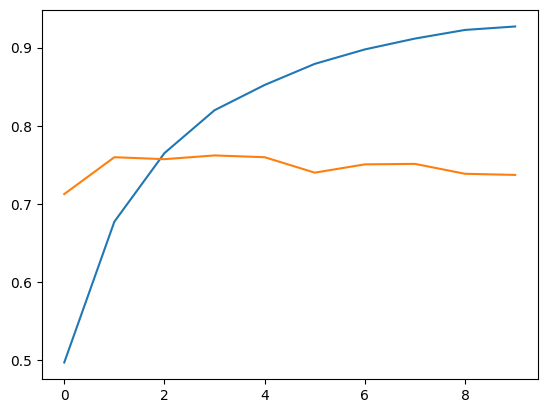

In [113]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [115]:
# Prediction 1
text = "The movie was bad bad bad, i will not recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 [==============================] - 0s 103ms/step
Negative Sentiment


In [116]:
text = "The movie was good, i will recommend this movie to anyone"

new_text_seq = tokenizer.texts_to_sequences([text])
new_text_padded = pad_sequences(new_text_seq, padding='post', maxlen=35)  # Use the max_len determined during training
predictions = model.predict(new_text_padded)
predicted_class_index = predictions.argmax(axis=-1)
if predicted_class_index[0] == 0:
    print("Postive Sentiment");
elif predicted_class_index[0] == 1:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

1/1 [==============================] - 0s 26ms/step
Postive Sentiment
